# Covid-19 World Vaccination

### Tracking the progress of COVID-19 vaccination

On December 2, 2020, the United Kingdom approved the first vaccine against Covid-19 and, six days later, vaccinated the first person with the Pfizer vaccine. It was the first step towards the massive adoption of vaccines and the beginning of the vaccination programs globally.

Three months later, how have vaccination programs evolved? What are the most used vaccines? Which countries have the fastest vaccination rate? And which vaccinate more (both absolute and in percent of the population)?

To get an overview of this evolution, I decided to collect and analyse data of the world vaccinations from Our World in Data using Python.

<div>
<img src="attachment:covid.jpg" width="500"/>
</div>

<div>
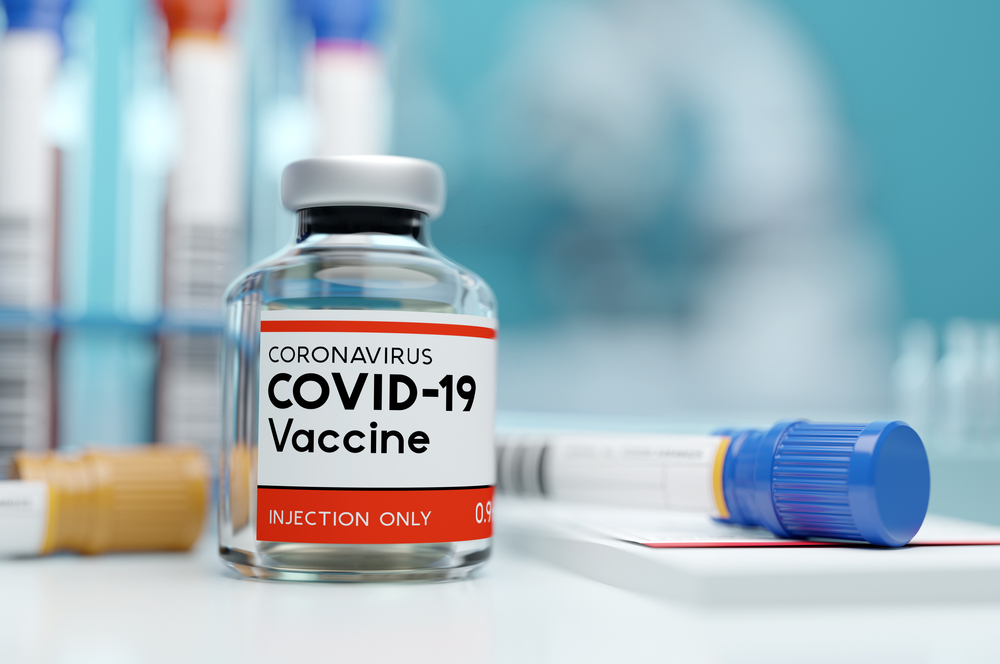
</div>


The data contains the following information:

- **Country** - this is the country for which the vaccination information is provided;
- **Country ISO Code** - ISO code for the country;
- **Date** - date for the data entry; for some of the dates we have only the daily vaccinations, for others, only the (cumulative) total;
- **Total number of vaccinations** - this is the absolute number of total immunizations in the country;
- **Total number of people vaccinated** - a person, depending on the immunization scheme, will receive one or more (typically 2) vaccines; at a certain moment, the number of vaccination might be larger than the number of people;
- **Total number of people fully vaccinated** - this is the number of people that received the entire set of immunization according to the immunization scheme (typically 2); at a certain moment in time, there might be a certain number of people that received one vaccine and another number (smaller) of people that received all vaccines in the scheme;
- **Daily vaccinations (raw)** - for a certain data entry, the number of vaccination for that date/country;
- **Daily vaccinations** - for a certain data entry, the number of vaccination for that date/country;
- **Total vaccinations per hundred** - ratio (in percent) between vaccination number and total population up to the date in the country;
- **Total number of people vaccinated per hundred** - ratio (in percent) between population immunized and total population up to the date in the country;
- **Total number of people fully vaccinated per hundred** - ratio (in percent) between population fully immunized and total population up to the date in the country;
- **Number of vaccinations per day** - number of daily vaccination for that day and country;
- **Daily vaccinations per million** - ratio (in ppm) between vaccination number and total population for the current date in the country;
- **Vaccines used in the country** - total number of vaccines used in the country (up to date);
- **Source name** - source of the information (national authority, international organization, local organization etc.);
- **Source website** - website of the source of information;


### Data Preparation

In [195]:
# Importing packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
import folium
from folium.plugins import MarkerCluster 
from geopy.exc import GeocoderTimedOut 
from geopy.geocoders import Nominatim 

In [196]:
# Reading the csv file
covid_vacc=pd.read_csv('C:/Users/ricar/OneDrive/Ambiente de Trabalho/Datasets/Kaggle Datasets/COVID 19 World vaccination/country_vaccinations.csv', sep=',')
covid_vacc.drop(['source_name','source_website'], inplace=True, axis=1)
display(covid_vacc.head())

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines
0,Albania,ALB,2021-01-10,0.0,0.0,NaN,NaN,NaN,0.00,0.00,NaN,NaN,Pfizer/BioNTech
1,Albania,ALB,2021-01-11,NaN,NaN,NaN,NaN,64.0,NaN,NaN,NaN,22.0,Pfizer/BioNTech
2,Albania,ALB,2021-01-12,128.0,128.0,NaN,NaN,64.0,0.00,0.00,NaN,22.0,Pfizer/BioNTech
3,Albania,ALB,2021-01-13,188.0,188.0,NaN,60.0,63.0,0.01,0.01,NaN,22.0,Pfizer/BioNTech
4,Albania,ALB,2021-01-14,266.0,266.0,NaN,78.0,66.0,0.01,0.01,NaN,23.0,Pfizer/BioNTech


In [197]:
# Countries in the dataset
unique_countries=covid_vacc['country'].unique()

# UK and each country of UK are represented here. 
#I decided to drop Wales,Scotland,England and Northern Ireland, leaving just UK as it gather the data of this 4 countries
covid_vacc=covid_vacc[(covid_vacc['country'] != 'Wales')&(covid_vacc['country'] != 'Scotland')&(covid_vacc['country'] != 'Northern Ireland')&(covid_vacc['country'] != 'England')]

In [198]:
# Checking the shape of the dataframe
ncols=len(covid_vacc.columns)
nrows=len(covid_vacc.index)
print('This dataframe has {nrows} rows and {ncols} columns.'.format(nrows=nrows,ncols=ncols))

This dataframe has 3945 rows and 13 columns.


#### Checking each column type

In [199]:
print(covid_vacc.dtypes)

country                                 object
iso_code                                object
date                                    object
total_vaccinations                     float64
people_vaccinated                      float64
people_fully_vaccinated                float64
daily_vaccinations_raw                 float64
daily_vaccinations                     float64
total_vaccinations_per_hundred         float64
people_vaccinated_per_hundred          float64
people_fully_vaccinated_per_hundred    float64
daily_vaccinations_per_million         float64
vaccines                                object
dtype: object


In [200]:
# Converting date to DateTime type
covid_vacc['date']=pd.to_datetime(covid_vacc['date'])
print(covid_vacc['date'].dtype)


datetime64[ns]


#### Missing values

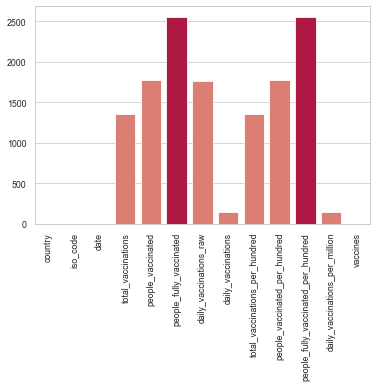

In [201]:
# Counting the missing values by column
missing_values=covid_vacc.isna().sum()
# Rules for coloring columns
colors=['#ec7063' if (x < max(missing_values)) else '#C70039' for x in missing_values]
# Seaborn bar plot customization
sns.set_style("whitegrid")
sns.set_context('paper')
sns.barplot(x=missing_values.index, y=missing_values, palette=colors)
plt.xticks(rotation=90)
# Show figure
plt.show()


##### Filling missing values 

In [202]:
# Filling the missing values
covid_vacc = covid_vacc.apply(lambda x: x.fillna(0) if x.dtype.kind in 'biufc' else x.fillna('Unknown'))
covid_vacc.isna().sum()

country                                0
iso_code                               0
date                                   0
total_vaccinations                     0
people_vaccinated                      0
people_fully_vaccinated                0
daily_vaccinations_raw                 0
daily_vaccinations                     0
total_vaccinations_per_hundred         0
people_vaccinated_per_hundred          0
people_fully_vaccinated_per_hundred    0
daily_vaccinations_per_million         0
vaccines                               0
dtype: int64

### Which vaccine has greatest global reach?

In [203]:
recent_date=covid_vacc[covid_vacc['date']=='2021-02-17']
vacc_ordered=recent_date['vaccines'].str.get_dummies(sep=', ').sum().sort_values(ascending=False)
print(vacc_ordered)

Pfizer/BioNTech       60
Oxford/AstraZeneca    44
Moderna               28
Sinopharm/Beijing     10
Sputnik V              8
Sinovac                4
Sinopharm/Wuhan        1
Johnson&Johnson        1
Covaxin                1
dtype: int64


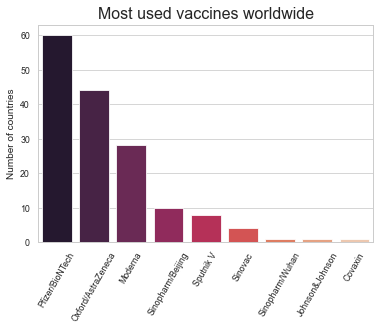

In [204]:
# Plot context, style and subplot
sns.set_style("whitegrid")
sns.set_context('paper')
f, ax = plt.subplots(1, 1)
# Seaborn bar plot customization
sns.barplot(x=vacc_ordered.index, y=vacc_ordered, palette='rocket')
ax.set_title("Most used vaccines worldwide", fontsize=16)
ax.set_ylabel('Number of countries', fontsize=10)

plt.xticks(rotation=60)
plt.show()

### Which countries have vaccinated more people?

In [205]:
# Df with top 10 countries by total vaccinations
cnt_total_vacc=covid_vacc[covid_vacc['date']=='2021-02-17'].groupby(['country','iso_code','vaccines'])['total_vaccinations'].sum().reset_index()
top_10_countries=cnt_total_vacc[['country','vaccines','total_vaccinations']].sort_values('total_vaccinations', ascending=False).reset_index(drop=True).head(10)
pd.set_option('display.max_colwidth', 85)
display(top_10_countries)

,country,vaccines,total_vaccinations
0,United States,"Moderna, Pfizer/BioNTech",56281827.0
1,United Kingdom,"Oxford/AstraZeneca, Pfizer/BioNTech",16996806.0
2,India,"Covaxin, Oxford/AstraZeneca",9186757.0
3,Israel,"Moderna, Pfizer/BioNTech",6936513.0
4,Brazil,"Oxford/AstraZeneca, Sinovac",5883539.0
5,United Arab Emirates,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm/Beijing, Sinopharm/Wuhan, Sputnik V",5284406.0
6,Turkey,Sinovac,5223602.0
7,Germany,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech",4607552.0
8,France,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech",3329201.0
9,Italy,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech",3228064.0


### Which country has vaccinated more people (per 100 people)?

In [207]:
# Df with total vaccinations per 100 people by country
cnt_total_vacc_100=covid_vacc[covid_vacc['date']=='2021-02-17'].groupby(['country','vaccines'])['total_vaccinations_per_hundred'].sum().reset_index()

# Df with top 10 countries by total vaccinations per 100 people
cnt_total_vacc_100=cnt_total_vacc_100.sort_values(by='total_vaccinations_per_hundred', ascending=False).reset_index(drop=True).head(10)

pd.set_option('display.max_colwidth', 80)
display(cnt_total_vacc_100)

,country,vaccines,total_vaccinations_per_hundred
0,Gibraltar,Pfizer/BioNTech,82.18
1,Israel,"Moderna, Pfizer/BioNTech",80.14
2,Seychelles,"Oxford/AstraZeneca, Sinopharm/Beijing",62.39
3,United Arab Emirates,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm/Beijing, Sinopharm/Wuhan, Spu...",53.43
4,Cayman Islands,Pfizer/BioNTech,25.45
5,United Kingdom,"Oxford/AstraZeneca, Pfizer/BioNTech",25.04
6,Isle of Man,"Oxford/AstraZeneca, Pfizer/BioNTech",17.41
7,United States,"Moderna, Pfizer/BioNTech",16.83
8,Bahrain,"Pfizer/BioNTech, Sinopharm/Beijing",15.14
9,Chile,"Pfizer/BioNTech, Sinovac",13.56


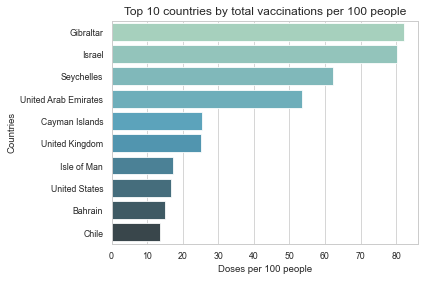

In [208]:
# Seaborn Bar plot and customization
sns.set_style("whitegrid")
sns.set_context('paper')
f, ax = plt.subplots(1, 1)

ax=sns.barplot(y='country',x='total_vaccinations_per_hundred',data=cnt_total_vacc_100,palette='GnBu_d')
ax.set_xlabel('Doses per 100 people')
ax.set_ylabel('Countries')
ax.set_title('Top 10 countries by total vaccinations per 100 people', fontsize=12)

# Ensures that all data is displayed and saves the plot into a png file
plt.tight_layout()
plt.savefig('total_vacc_100.jpg',dpi=100)
plt.show()


###  Interactive map of total vaccinations

##### Getting latitute and longitude for each country 

In [209]:
# Empty list to store longitude & latitude
longitude = [] 
latitude = [] 

# Function to find the coordinate of a given country
def findGeocode(country): 

    # Try and catch is used to overcome the exception thrown by geolocator using geocodertimedout 
    try: 
        geolocator = Nominatim(user_agent="ricardoecnetto@gmail.com") 

        return geolocator.geocode(country) 

    except GeocoderTimedOut: 

        return findGeocode(country)

# Each value from  the country column will be fetched and sent to function find_geocode 
for i in (cnt_total_vacc["country"]): 

    if findGeocode(i) != None: 

        loc = findGeocode(i) 

        # Storing the coordinates
        latitude.append(loc.latitude) 
        longitude.append(loc.longitude) 
        
    # Filling with "NA" the missing values
    else: 
        latitude.append(np.nan) 
        longitude.append(np.nan) 

# Adding the coordinates to the dataframe
cnt_total_vacc["Longitude"] = longitude 
cnt_total_vacc["Latitude"] = latitude 

In [210]:
# For each coordinate, create circlemarker of total vaccinations
f = folium.Figure(width=1000, height=500)
world_map= folium.Map(tiles="cartodbpositron",max_bounds=True,min_zoom = 1.5).add_to(f)
marker_cluster = MarkerCluster().add_to(world_map) 

for i in range(len(cnt_total_vacc)):
        lat = cnt_total_vacc.iloc[i]['Latitude']
        long = cnt_total_vacc.iloc[i]['Longitude']
        radius=5
        popup_text = """Country : {}<br> Total vaccinations: {}<br>"""
        popup_text = popup_text.format(cnt_total_vacc.iloc[i]['country'],cnt_total_vacc.iloc[i]['total_vaccinations'])
        folium.CircleMarker(location = [lat, long], radius=radius, popup= popup_text, fill =True).add_to(marker_cluster)
#show the map
world_map
